## Capstone Project - Winonsin Breast Cancer Diagnosis Deep Learning Revisited






#### Import necessary libraries

In [218]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

from sklearn.preprocessing import MinMaxScaler

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

#### Load in WBCD dataset

In [219]:
# Load the Boston housing dataset
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.csv', names = headers)
data = data.reset_index(drop=True)

#### Handle missing data
* Quite a few Bare Nuclei entries are missing and marked as "?".

In [220]:
data = data.replace('?', np.nan)
data = data.fillna(0)

#### Define a data generation function with random noise

In [221]:
def generateData(data):
    # make a copy of data
    data2 = data

    # separate labels from features
    diagnosis2 = data2['Diagnosis'] # labels
    features2 = data2.drop(['ID','Diagnosis'], axis = 1)
    features2_headers = ["CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses"]

    mean, sigma = 0, 0.1 
    # creating a noise with the same dimension as the dataset 
    noise = np.random.normal(mean, sigma, features2.shape) 

    features2 = features2.apply(pd.to_numeric, errors='ignore')

    features2_with_noise = features2.add(pd.DataFrame(noise, columns = features2_headers), fill_value=0)

    data2 = pd.concat([features2_with_noise, pd.DataFrame(diagnosis2)], axis = 1)
    
    return data2

#### Add the new generated dataset into the existing dataset

In [222]:
new_data = generateData(data)
data = data.append(new_data, ignore_index=True)

new_data = generateData(data)
data = data.append(new_data, ignore_index=True)

print("data size = ", data.size)

('data size = ', 30756)


#### Scale dataset to the range of [0, 1]

In [223]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ["Diagnosis","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses"]
data[numerical] = scaler.fit_transform(data[numerical])

#### Separate Labels/Classes from Features

In [224]:
diagnosis = data['Diagnosis']
features = data.drop(['ID','Diagnosis'], axis = 1)

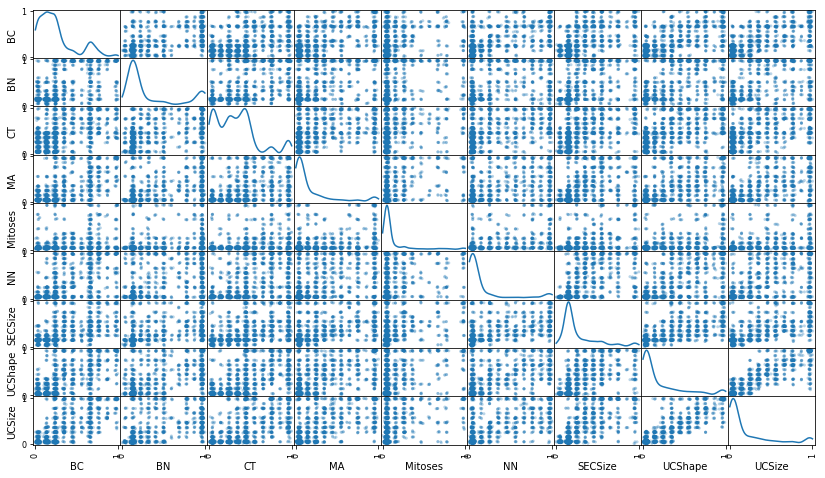

In [225]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(features, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

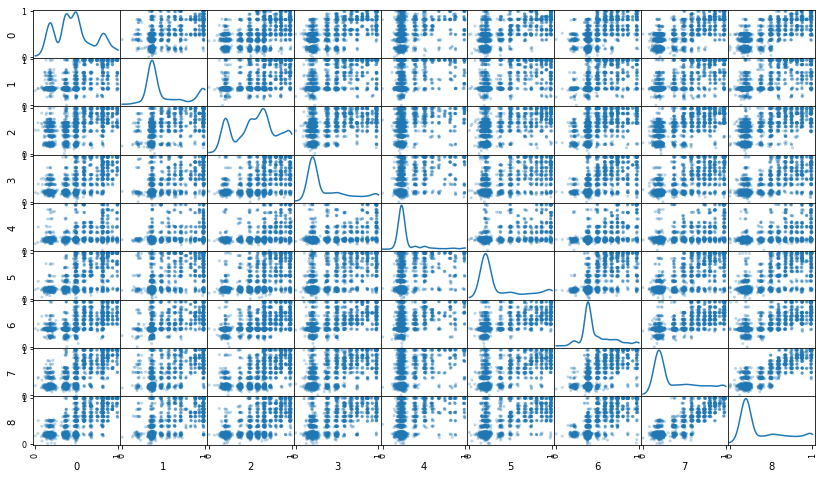

In [226]:
# Scale the data using the natural logarithm
sqrt_features = features.copy()

for feature_name in sqrt_features.columns:
    sqrt_features[feature_name] = np.sqrt(sqrt_features[feature_name]) 
    
sqrt_features = sqrt_features.replace([np.inf, -np.inf], np.nan)
sqrt_features = sqrt_features.fillna(0)

sqrt_features = scaler.fit_transform(sqrt_features)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(pd.DataFrame(sqrt_features), alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# convert numpy ndarray into Pandas DataFrame
features = pd.DataFrame(sqrt_features)

#### Split dataset into training and testing datasets

In [227]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, diagnosis, test_size=0.25, random_state=42)

#### Reindex 

In [228]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#### Convert Pandas DataFrame to Numpy ndarray
* This conversion is necessary because Pandas DataFrame is not consist with Keras API.

In [229]:
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

#### Classify dataset using Random Forest Classifier

In [230]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

score = rfc.score(X_test, y_test)
print("score = ", score)

('score = ', 0.96709585121602293)


#### Deep learning

In [231]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
import keras
import keras.utils
from keras import utils as np_utils

#### Define NN Architecture

In [232]:
model = Sequential()

#Define your architecture.
model.add(Dense(9, activation='relu', input_dim=9))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu', input_shape=(9,)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu', input_shape=(5,)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_21 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_42 (Dense)             (None, 5)                 50        
_________________________________________________________________
dropout_22 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 6         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 2         
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


#### Compile NN Model

In [233]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#### Train NN Model

In [234]:
model.fit(X_train, y_train, epochs=400, batch_size=14)

Epoch 1/400
2097/2097 [==============================] - 0s - loss: 0.6746 - acc: 0.6972     
Epoch 2/400
2097/2097 [==============================] - 0s - loss: 0.6444 - acc: 0.7864     
Epoch 3/400
2097/2097 [==============================] - 0s - loss: 0.5990 - acc: 0.8202     
Epoch 4/400
2097/2097 [==============================] - 0s - loss: 0.5570 - acc: 0.8326     
Epoch 5/400
2097/2097 [==============================] - 0s - loss: 0.5188 - acc: 0.8503     
Epoch 6/400
2097/2097 [==============================] - 0s - loss: 0.4913 - acc: 0.8550     
Epoch 7/400
2097/2097 [==============================] - 0s - loss: 0.4462 - acc: 0.8703     
Epoch 8/400
2097/2097 [==============================] - 0s - loss: 0.4225 - acc: 0.8765     
Epoch 9/400
2097/2097 [==============================] - 0s - loss: 0.3970 - acc: 0.8870     
Epoch 10/400
2097/2097 [==============================] - 0s - loss: 0.3850 - acc: 0.8856     
Epoch 11/400
2097/2097 [==============================] - 0

2097/2097 [==============================] - 0s - loss: 0.2022 - acc: 0.9485     
Epoch 87/400
2097/2097 [==============================] - 0s - loss: 0.2368 - acc: 0.9437     
Epoch 88/400
2097/2097 [==============================] - 0s - loss: 0.2111 - acc: 0.9447     
Epoch 89/400
2097/2097 [==============================] - 0s - loss: 0.2155 - acc: 0.9456     
Epoch 90/400
2097/2097 [==============================] - 0s - loss: 0.2367 - acc: 0.9375     
Epoch 91/400
2097/2097 [==============================] - 0s - loss: 0.2272 - acc: 0.9428     
Epoch 92/400
2097/2097 [==============================] - 0s - loss: 0.2163 - acc: 0.9461     
Epoch 93/400
2097/2097 [==============================] - 0s - loss: 0.2467 - acc: 0.9385     
Epoch 94/400
2097/2097 [==============================] - 0s - loss: 0.2157 - acc: 0.9442     
Epoch 95/400
2097/2097 [==============================] - 0s - loss: 0.2162 - acc: 0.9504     
Epoch 96/400
2097/2097 [==============================] - 0s - 

2097/2097 [==============================] - 0s - loss: 0.2159 - acc: 0.9485     
Epoch 172/400
2097/2097 [==============================] - 0s - loss: 0.2143 - acc: 0.9518     
Epoch 173/400
2097/2097 [==============================] - 0s - loss: 0.2188 - acc: 0.9442     
Epoch 174/400
2097/2097 [==============================] - 0s - loss: 0.2126 - acc: 0.9504     
Epoch 175/400
2097/2097 [==============================] - 0s - loss: 0.2326 - acc: 0.9394     
Epoch 176/400
2097/2097 [==============================] - 0s - loss: 0.2031 - acc: 0.9504     
Epoch 177/400
2097/2097 [==============================] - 0s - loss: 0.2188 - acc: 0.9480     
Epoch 178/400
2097/2097 [==============================] - 0s - loss: 0.2194 - acc: 0.9504     
Epoch 179/400
2097/2097 [==============================] - 0s - loss: 0.2226 - acc: 0.9495     
Epoch 180/400
2097/2097 [==============================] - 0s - loss: 0.2107 - acc: 0.9523     
Epoch 181/400
2097/2097 [=============================

2097/2097 [==============================] - 0s - loss: 0.2108 - acc: 0.9499     
Epoch 256/400
2097/2097 [==============================] - 0s - loss: 0.1859 - acc: 0.9542     
Epoch 257/400
2097/2097 [==============================] - 0s - loss: 0.2153 - acc: 0.9452     
Epoch 258/400
2097/2097 [==============================] - 0s - loss: 0.1814 - acc: 0.9571     
Epoch 259/400
2097/2097 [==============================] - 0s - loss: 0.2175 - acc: 0.9495     
Epoch 260/400
2097/2097 [==============================] - 0s - loss: 0.2174 - acc: 0.9475     
Epoch 261/400
2097/2097 [==============================] - 0s - loss: 0.2338 - acc: 0.9461     
Epoch 262/400
2097/2097 [==============================] - 0s - loss: 0.2258 - acc: 0.9437     
Epoch 263/400
2097/2097 [==============================] - 0s - loss: 0.2068 - acc: 0.9537     
Epoch 264/400
2097/2097 [==============================] - 0s - loss: 0.2139 - acc: 0.9533     
Epoch 265/400
2097/2097 [=============================

2097/2097 [==============================] - 0s - loss: 0.1978 - acc: 0.9499     
Epoch 341/400
2097/2097 [==============================] - 0s - loss: 0.2098 - acc: 0.9471     
Epoch 342/400
2097/2097 [==============================] - 0s - loss: 0.1933 - acc: 0.9504     
Epoch 343/400
2097/2097 [==============================] - 0s - loss: 0.2068 - acc: 0.9466     
Epoch 344/400
2097/2097 [==============================] - 0s - loss: 0.2026 - acc: 0.9523     
Epoch 345/400
2097/2097 [==============================] - 0s - loss: 0.2109 - acc: 0.9490     
Epoch 346/400
2097/2097 [==============================] - 0s - loss: 0.2183 - acc: 0.9475     
Epoch 347/400
2097/2097 [==============================] - 0s - loss: 0.2287 - acc: 0.9523     
Epoch 348/400
2097/2097 [==============================] - 0s - loss: 0.2157 - acc: 0.9528     
Epoch 349/400
2097/2097 [==============================] - 0s - loss: 0.2256 - acc: 0.9447     
Epoch 350/400
2097/2097 [=============================

#### Test NN Model

In [236]:
score = model.evaluate(X_test, y_test, batch_size=14)
print("score = ", score)

 14/699 [..............................] - ETA: 0s('score = ', [0.16116398684840347, 0.97567953589307055])
